# COVID-19 World Vaccination Progress Data Analysis Report

by Hattie Goff, 27 March 2021

COVID-19 was first identified in Wuhan, China in December 2019. By March 2020 the World Health Organization declared a pandemic. 

Vaccines allow our body to develop an immunity to disease without becoming ill. They contain a weakend or inactive part of a pathogen, called an antigen, which then triggers the production of the relevant antibodies needed to fight the disease. As these antibodies remain in the immune system after the infection has gone, the immune system develops memory cells. If the disease is encountered again the revelant antibodies needed to fight the disease are known and triggered on a shorter timescale than symptoms developing, preventing the infection from becoming harmful. 

This report aims to answer the following questions:

- Which countries are administering the greatest number of vaccines?
- Which countries have the most advanched vaccination programme so far (i.e. percentage of the population who have been vaccinated and fully vaccinated)?
- Which vaccines are used more commonly?
- Globally, how was the vaccine administration progressed over time?

**n.b. this report is based on data up until 16/03/21**

## Getting and preparing the data

The data was obtained from https://urldefense.com/v3/__https://ourworldindata.org__;!!KwM0_Rgk!e4MlR-zNuX8Z446qrxJQAdyju0-qWL2Wj7GUzGHIWKRpZfSbhNnDBVsZ686amceq4Q$  accesed from kaggle (https://urldefense.com/v3/__https://www.kaggle.com/gpreda/covid-world-vaccination-progress__;!!KwM0_Rgk!e4MlR-zNuX8Z446qrxJQAdyju0-qWL2Wj7GUzGHIWKRpZfSbhNnDBVsZ686ZEnjroA$ ) on 16/03/21

Data collected between 13/12/20 - 16/03/21

The dataset includes information about:
- **Country**: the country for which vaccination information is provided;
- **Country ISO Code** - ISO code for the country;
- **Date** - date for the data entry;
- **Total number of vaccinations** - absolute number of total immunisations in the country;
- **Total number of people vaccinated** - total number of people vaccinated; n.b. depending on the immunisation scheme, people will recieve one or more vaccines therefore the number of vaccinations may be larger than the number of people;
- **Total number of people fully vaccinated** - the total number of people that have received the entire set of immunisation according to the immunisation scheme;
- **Daily vaccinations (raw)** - for a certain data entry, the number of vaccination for that date/country;
- **Daily vaccinations** - for a certain data entry, the number of vaccination for that date/country;
- **Total vaccinations per hundred** - ratio (in percent) between vaccination number and total population up to the date in the country;
- **Total number of people vaccinated per hundred** - ratio (in percent) between population immunised and total population;
- **Total number of people fully vaccinated per hundred** - ratio (in percent) between population fully immunised and total population;
- **Number of vaccinations per day** - number of daily vaccinations for that day and country;
- **Daily vaccinations per million** - ratio (in ppm) between vaccination number and total population for the current date in the country;
- **Vaccines used in the country** - total number of vaccines used in the country;
- **Source name** - source of the information (national authority, international organization, local organization etc.);
- **Source website** - website of the source of information;

## Importing and cleaning the data

In [64]:
# importing relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns
from scipy.stats import linregress

In [65]:
# importing the data from a csv file

data = pd.read_csv('country_vaccinations.csv')
data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://urldefense.com/v3/__https://shendetesia.gov.al/covid19-ministria-e__;!!KwM0_Rgk!e4MlR-zNuX8Z446qrxJQAdyju0-qWL2Wj7GUzGHIWKRpZfSbhNnDBVsZ686G4aeSCQ$ ...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://urldefense.com/v3/__https://shendetesia.gov.al/covid19-ministria-e__;!!KwM0_Rgk!e4MlR-zNuX8Z446qrxJQAdyju0-qWL2Wj7GUzGHIWKRpZfSbhNnDBVsZ686G4aeSCQ$ ...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://urldefense.com/v3/__https://shendetesia.gov.al/covid19-ministria-e__;!!KwM0_Rgk!e4MlR-zNuX8Z446qrxJQAdyju0-qWL2Wj7GUzGHIWKRpZfSbhNnDBVsZ686G4aeSCQ$ ...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://urldefense.com/v3/__https://shendetesia.gov.al/covid19-ministria-e__;!!KwM0_Rgk!e4MlR-zNuX8Z446qrxJQAdyju0-qWL2Wj7GUzGHIWKRpZfSbhNnDBVsZ686G4aeSCQ$ ...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://urldefense.com/v3/__https://shendetesia.gov.al/covid19-ministria-e__;!!KwM0_Rgk!e4MlR-zNuX8Z446qrxJQAdyju0-qWL2Wj7GUzGHIWKRpZfSbhNnDBVsZ686G4aeSCQ$ ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,Zimbabwe,ZWE,2021-03-12,36283.0,36283.0,NaN,264.0,708.0,0.24,0.24,NaN,48.0,Sinopharm/Beijing,Ministry of Health,https://urldefense.com/v3/__https://twitter.com/MoHCCZim/status/1371917996__;!!KwM0_Rgk!e4MlR-zNuX8Z446qrxJQAdyju0-qWL2Wj7GUzGHIWKRpZfSbhNnDBVsZ685sCUe0QQ$ ...
6741,Zimbabwe,ZWE,2021-03-13,36359.0,36359.0,NaN,76.0,621.0,0.24,0.24,NaN,42.0,Sinopharm/Beijing,Ministry of Health,https://urldefense.com/v3/__https://twitter.com/MoHCCZim/status/1371917996__;!!KwM0_Rgk!e4MlR-zNuX8Z446qrxJQAdyju0-qWL2Wj7GUzGHIWKRpZfSbhNnDBVsZ685sCUe0QQ$ ...
6742,Zimbabwe,ZWE,2021-03-14,36359.0,36359.0,NaN,0.0,588.0,0.24,0.24,NaN,40.0,Sinopharm/Beijing,Ministry of Health,https://urldefense.com/v3/__https://twitter.com/MoHCCZim/status/1371917996__;!!KwM0_Rgk!e4MlR-zNuX8Z446qrxJQAdyju0-qWL2Wj7GUzGHIWKRpZfSbhNnDBVsZ685sCUe0QQ$ ...
6743,Zimbabwe,ZWE,2021-03-15,37660.0,37660.0,NaN,1301.0,306.0,0.25,0.25,NaN,21.0,Sinopharm/Beijing,Ministry of Health,https://urldefense.com/v3/__https://twitter.com/MoHCCZim/status/1371917996__;!!KwM0_Rgk!e4MlR-zNuX8Z446qrxJQAdyju0-qWL2Wj7GUzGHIWKRpZfSbhNnDBVsZ685sCUe0QQ$ ...


In [66]:
# removing unwanted columns
# source name and website are not needed for this analysis

data.drop(columns=['source_name', 'source_website']).head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech


In [67]:
#counting the NaN (not a number) values

data.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     2502
people_vaccinated                      2960
people_fully_vaccinated                4169
daily_vaccinations_raw                 3169
daily_vaccinations                      195
total_vaccinations_per_hundred         2502
people_vaccinated_per_hundred          2960
people_fully_vaccinated_per_hundred    4169
daily_vaccinations_per_million          195
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [68]:
#percentage of missing values in each column

percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

country                                 0.000000
iso_code                                0.000000
date                                    0.000000
total_vaccinations                     37.094144
people_vaccinated                      43.884359
people_fully_vaccinated                61.808747
daily_vaccinations_raw                 46.982950
daily_vaccinations                      2.891030
total_vaccinations_per_hundred         37.094144
people_vaccinated_per_hundred          43.884359
people_fully_vaccinated_per_hundred    61.808747
daily_vaccinations_per_million          2.891030
vaccines                                0.000000
source_name                             0.000000
source_website                          0.000000
dtype: float64

As you can see there are lots of missing values in this data set, up to 61% in some columns, most likely from when vaccinations were not recorded, or not yet started.

All these variables are important for analysis so we'll leave them in although it should be taken into consideration that the data set is incomplete.

## Data Analysis

### Leaders in the number of people vaccinated

In [69]:
#calculating the total vaccinations so far per country (absoluete number)
#creating a new dataframe containing the two columns - 'country' and 'total vaccinations'

total_vaccinations = data.groupby('country', as_index=False)['daily_vaccinations'].sum()

#renaming the columns

total_vaccinations = total_vaccinations.rename(columns={'daily_vaccinations' : 'Total vaccinations'})
total_vaccinations = total_vaccinations.rename(columns={'country' : 'Country'})
total_vaccinations

,Country,Total vaccinations
0,Albania,21051.0
1,Algeria,69070.0
2,Andorra,3357.0
3,Angola,6168.0
4,Anguilla,5228.0
...,...,...
132,Uruguay,215333.0
133,Venezuela,8704.0
134,Vietnam,10829.0
135,Wales,1324381.0


In [70]:
#sorting the total vaccinations values into descending order
#resetting and dropping the old index

total_vaccinations_sorted = total_vaccinations.sort_values('Total vaccinations', ascending = False).reset_index(drop=True)

total_vaccinations_sorted

,Country,Total vaccinations
0,United States,103795021.0
1,China,61372497.0
2,India,30148957.0
3,United Kingdom,25422181.0
4,England,21403982.0
...,...,...
132,Guyana,1846.0
133,Egypt,1314.0
134,Montserrat,1002.0
135,Trinidad and Tobago,441.0


In [71]:
#removing england as its in the UK and resetting the index

total_vaccinations_sorted.drop(index=4, inplace=True)
total_vaccinations_sorted_2= total_vaccinations_sorted.reset_index(drop=True)
total_vaccinations_sorted_2

,Country,Total vaccinations
0,United States,103795021.0
1,China,61372497.0
2,India,30148957.0
3,United Kingdom,25422181.0
4,Turkey,11660063.0
...,...,...
131,Guyana,1846.0
132,Egypt,1314.0
133,Montserrat,1002.0
134,Trinidad and Tobago,441.0


In [72]:
#showing the top 20 entries

total_vaccinations_sorted_2.head(20)

,Country,Total vaccinations
0,United States,103795021.0
1,China,61372497.0
2,India,30148957.0
3,United Kingdom,25422181.0
4,Turkey,11660063.0
5,Brazil,11056121.0
6,Israel,9325397.0
7,Germany,9294960.0
8,Russia,7191906.0
9,France,6944424.0


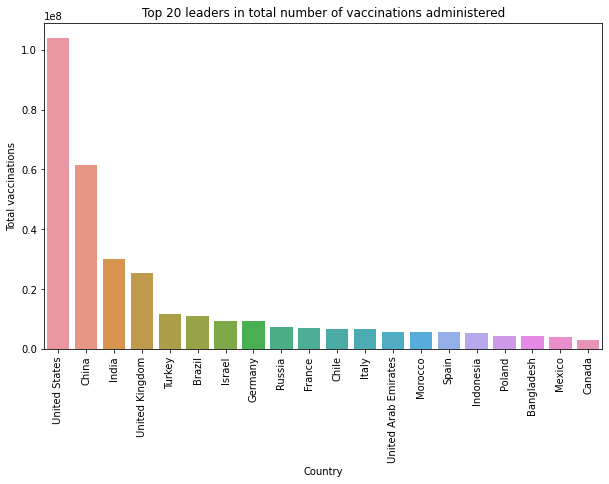

In [73]:
#plotting the data

plt.figure(figsize= (10,6))
plt.title('Top 20 leaders in total number of vaccinations administered')
plt.xticks(rotation=90)
chart = sns.barplot(
    x =total_vaccinations_sorted_2.head(20) ['Country'],
    y =total_vaccinations_sorted_2.head(20)['Total vaccinations'])

# scale = 10^8

As you can see the US, China, India and the UK are leading the way for the number of vaccinations administered. 

Let's have a look at this per percentage of the population:

In [74]:
people_vaccinated = data.groupby('country', as_index=False)['people_vaccinated_per_hundred'].max()
people_vaccinated

# people vaccinated per hundred = percentage of the total population vaccinated 

,country,people_vaccinated_per_hundred
0,Albania,0.21
1,Algeria,NaN
2,Andorra,4.72
3,Angola,0.02
4,Anguilla,33.33
...,...,...
132,Uruguay,6.21
133,Venezuela,0.04
134,Vietnam,0.02
135,Wales,36.15


In [75]:
#renaming the columns
people_vaccinated = people_vaccinated.rename(columns={'people_vaccinated_per_hundred' : 'Percentage of people vaccinated'})
people_vaccinated = people_vaccinated.rename(columns={'country' : 'Country'})
people_vaccinated

,Country,Percentage of people vaccinated
0,Albania,0.21
1,Algeria,NaN
2,Andorra,4.72
3,Angola,0.02
4,Anguilla,33.33
...,...,...
132,Uruguay,6.21
133,Venezuela,0.04
134,Vietnam,0.02
135,Wales,36.15


In [76]:
#sorting into descending order

people_vaccinated_sorted = people_vaccinated.sort_values('Percentage of people vaccinated', ascending = False).reset_index(drop=True)
people_vaccinated_sorted

,Country,Percentage of people vaccinated
0,Gibraltar,88.06
1,Seychelles,62.10
2,Israel,59.39
3,Falkland Islands,49.73
4,Jersey,37.67
...,...,...
132,Panama,NaN
133,Saint Helena,NaN
134,Saudi Arabia,NaN
135,Sri Lanka,NaN


In [77]:
#showing the top 20 

people_vaccinated_sorted.head(20)

,Country,Percentage of people vaccinated
0,Gibraltar,88.06
1,Seychelles,62.10
2,Israel,59.39
3,Falkland Islands,49.73
4,Jersey,37.67
5,England,37.53
6,Cayman Islands,37.08
7,United Kingdom,36.59
8,Wales,36.15
9,Scotland,35.57


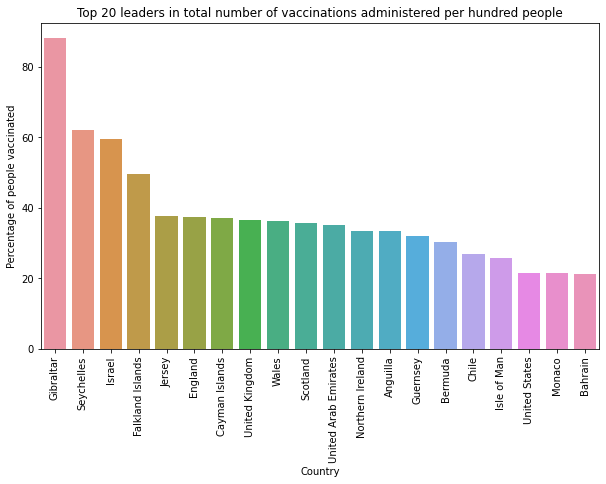

In [78]:
#plotting the graph
plt.figure(figsize= (10,6))
plt.title('Top 20 leaders in total number of vaccinations administered per hundred people')
plt.xticks(rotation=90)
chart = sns.barplot(
    x =people_vaccinated_sorted.head(20) ['Country'],
    y =people_vaccinated_sorted.head(20)['Percentage of people vaccinated'])

This graph allows us to see the vaccination progress per country. Gibraltar and Seychelles are leading the way with over 60% of their population vaccinated.

Lets repeat this analysis but with the percentage of people **fully** vaccinated.

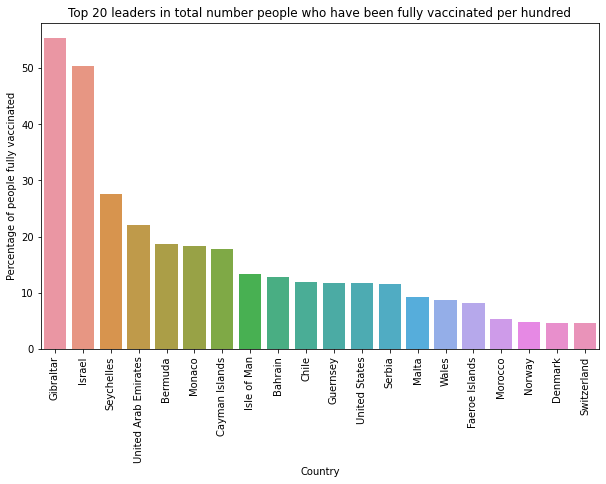

In [79]:
# doing the same but with Fully vaccinated people
# this time ive kept wales in as the UK doesnt appear in the top 20

people_fully_vaccinated = data.groupby('country', as_index=False)['people_fully_vaccinated_per_hundred'].max()
people_fully_vaccinated = people_fully_vaccinated.rename(columns={'people_fully_vaccinated_per_hundred' : 'Percentage of people fully vaccinated'})
people_fully_vaccinated = people_fully_vaccinated.rename(columns={'country' : 'Country'})
people_fully_vaccinated_sorted = people_fully_vaccinated.sort_values('Percentage of people fully vaccinated', ascending = False).reset_index(drop=True)

plt.figure(figsize= (10,6))
plt.title('Top 20 leaders in total number people who have been fully vaccinated per hundred')
plt.xticks(rotation=90)
chart = sns.barplot(
    x =people_fully_vaccinated_sorted.head(20) ['Country'],
    y =people_fully_vaccinated_sorted.head(20)['Percentage of people fully vaccinated'])

From the graph we can see that Gibraltar has the highest percentage of fully vaccinated people. When compared to the other countries in the top 20, Gilbraltar has a small population, this high percentage is to be expected.

The UK has a high proportion of its population vaccinated, but not fully vaccinated. The converse is true for Israel.

### Vaccine type per country

In [80]:
#grouping the data by country and vaccine type with the maxmimum total vaccinations

vaccines = data.groupby(by=['country', 'vaccines'], as_index=False)['total_vaccinations'].max()
vaccines

,country,vaccines,total_vaccinations
0,Albania,Pfizer/BioNTech,23635.0
1,Algeria,Sputnik V,75000.0
2,Andorra,Pfizer/BioNTech,4914.0
3,Angola,Oxford/AstraZeneca,6169.0
4,Anguilla,Oxford/AstraZeneca,5000.0
...,...,...,...
132,Uruguay,"Pfizer/BioNTech, Sinovac",215780.0
133,Venezuela,Sputnik V,12194.0
134,Vietnam,Oxford/AstraZeneca,20695.0
135,Wales,"Oxford/AstraZeneca, Pfizer/BioNTech",1412849.0


In [81]:
#grouping by the vaccine company and taking the sum of the total vaccinations for each vaccine company

top_vaccines = vaccines.groupby(by=['vaccines'], as_index = False)['total_vaccinations'].max()
top_vaccines = top_vaccines.rename(columns={'vaccines' : 'Vaccine type'})
top_vaccines = top_vaccines.rename(columns={'total_vaccinations' : 'Total number of vaccinations administered'})
top_vaccines_sorted = top_vaccines.sort_values('Total number of vaccinations administered', ascending = False).reset_index(drop=True)
top_vaccines_sorted

,Vaccine type,Total number of vaccinations administered
0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",110737856.0
1,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",64980000.0
2,"Covaxin, Oxford/AstraZeneca",35064536.0
3,"Oxford/AstraZeneca, Pfizer/BioNTech",26503552.0
4,"Oxford/AstraZeneca, Sinovac",11895560.0
5,Sinovac,11696296.0
6,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",9853966.0
7,"Moderna, Pfizer/BioNTech",9502677.0
8,"EpiVacCorona, Sputnik V",7698889.0
9,"Pfizer/BioNTech, Sinovac",7408014.0


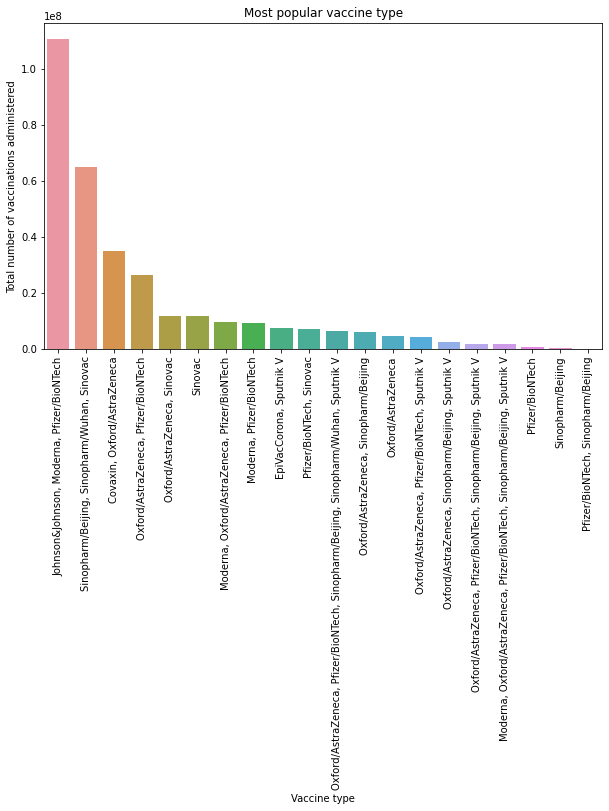

In [82]:
#plotting a graph of the top 20 

plt.figure(figsize= (10,6))
plt.title('Most popular vaccine type')
plt.xticks(rotation=90)
chart = sns.barplot(
    x = top_vaccines_sorted.head(20) ['Vaccine type'],
    y = top_vaccines_sorted.head(20)['Total number of vaccinations administered'])

#scale = 10^8

Johnson&Johnson, Moderna and Pfrizer/BioNTech are the 3 most common vaccines being used worldwide.

### Vaccine progress by time

Dates range from 13 Dec 2020 - 16 Mar 2021

In [83]:
# group by date and total vaccinations

vaccines_by_date = data.groupby(by=['date'], as_index=False)['total_vaccinations'].max()
vaccines_by_date = vaccines_by_date.rename(columns={'date' : 'Date'})
vaccines_by_date = vaccines_by_date.rename(columns={'total_vaccinations' : 'Total vaccinations'})
vaccines_by_date

,Date,Total vaccinations
0,2020-12-13,86465.0
1,2020-12-14,5.0
2,2020-12-15,1500000.0
3,2020-12-16,3023.0
4,2020-12-17,7202.0
...,...,...
89,2021-03-12,101128005.0
90,2021-03-13,105703501.0
91,2021-03-14,107060274.0
92,2021-03-15,109081860.0


<AxesSubplot:title={'center':'Total vaccination by date'}, xlabel='Date', ylabel='Total vaccinations'>

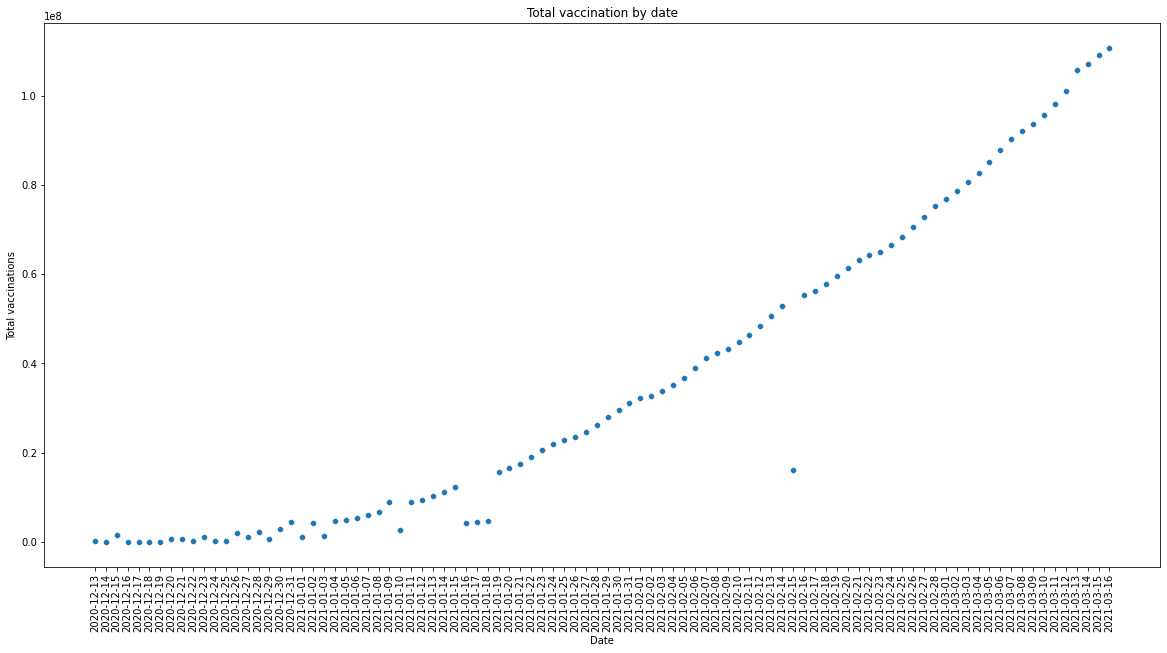

In [96]:
#plotting a graph
plt.figure(figsize= (20,10))
plt.xticks(rotation=90)
plt.title('Total vaccination by date')
sns.scatterplot(
    x = vaccines_by_date ['Date'],
    y = vaccines_by_date ['Total vaccinations'])